# # Apprentissage supervisé - Classification
December 24, 2020 <br>
projet mnist

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mninst = fetch_openml('mnist_784', version=1)

### 1. Le retour de la fonction "fetch_openml" est un dictionnaire (mnist). Affichez ces clés.

In [3]:
print(mninst.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


### 2. En utilisant les clés du dictionnaire "mnist", affichez :
La taille des données (le nombre des features et la taille de chaque feature). Par convention, les données sont à stocker dans une variable "X".
La taille des labels=classes (le nombre des labels). Par convention, les classes sont souvent à stocker dans une variable "y"

In [4]:
print("Features: ", mninst.data.shape, "taille des features: ", len(mninst.data))

Features:  (70000, 784) taille des features:  70000


In [5]:
print("Target", mninst.target.shape)

Target (70000,)


In [6]:
X = mninst.data
y = mninst.target

#### Les différentes classes de la base de données

In [7]:
print(np.unique(y))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


#### Une description détaillée de la base de données.

### A travers cette question, vous avez dû conclure que la base de données MNIST contient 
70 000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784
=28*28.

Affichez l’image de la première instance de la base de données.

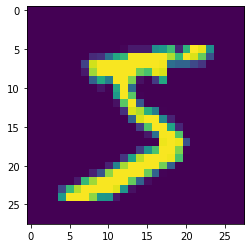

In [8]:

img = np.array((X[0]))
img = img.reshape(28,28)
plt.imshow(img)

#### Affichez la classe de la première instance

In [9]:
print(y[0])

5


### 4. Affichez le type des labels (du premier label par exemple)

In [39]:
print("les labels sont du type", type(y[0]))

les labels sont du type <class 'numpy.int32'>


### 5. A travers la question précédente, vous avez dû remarquer que le type des labels est
une chaîne de caractères. Il est préférable, dans les projets d’apprentissage automatique,

d’utiliser des chiffres. Par conséquent, appliquez le casting sur les labels pour les transformer à des entiers.

In [40]:
y = y.astype(int)
print("les labels sont maintenant du type",y.dtype)

les labels sont maintenant du type int32


## 1.3 Répartition des données
Contrairement aux précédents projets, les données dans MNIST sont déjà partitionnées en
base d’apprentissage et en base de test. Les 60 000 premières images composeront la base
d’apprentissage et le reste des images constituera la base de test. Écrivez un code qui met en
exergue cette répartition tout en stockant les données de test/d’apprentissage et les classes de
test/d’apprentissage dans 4 variables.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14285, random_state=42)
print(len(X_train), len(X_test))

60000 10000


## 2 Apprentissage d’un classifieur binaire
Comme indiqué dans les objectifs, ce projet vise à classifier les chiffres. Une des solutions est
d’utiliser un classifieur binaire qui est apte d’identifier que l’image représente bien le chiffre que
nous cherchons ou non. Par exemple, nous nous focaliserons sur la reconnaissance du chiffre 5
### 2.1 Apprentissage des données
1. En utilisant les labels d’apprentissage et de test, écrivez un code qui stocke dans deux variables (une première pour la base d’apprentissage et une autre pour la base de test) distinctes

True si le classe de l’instance est 5 et False Sinon. De ce fait, nous traitons une classification
binaire.

In [12]:
y_five_test = np.zeros((y_test.shape))
y_five_test = np.where(y_test == 5, True, False)

y_five_train = np.zeros((y_train.shape))
y_five_train = np.where(y_train == 5, True, False)

print(y_five_train[0:20])
print(y_train[0:20])

[False False False False False False False False False False False False
 False False False False False False False False]
[2 4 0 1 6 6 9 0 3 4 4 3 1 4 7 1 6 9 3 0]


2. Pour l’apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent (SGD). Utiliser ce modèle pour la prédiction sur un chiffre (exemple 5).

In [13]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_five_train)
SGDClassifier(max_iter=5)
y_five_predict = clf.predict(X_train)
print(clf.score(X_test, y_five_test))
print(y_five_predict[20:40])
print(y_five_train[20:40])

0.9327
[False False False False  True False  True False False  True False False
 False False  True False False False False False]
[False False False False False False False False False  True False False
 False False False False False False False False]


#### 2.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage
La mesure de performance d’une méthode de classification est souvent plus délicate qu’une méth-
ode de régression. Cela est dû au nombre de mesures de performance existantes dans la littérature.

#### 2.2.1 Taux de classification
1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher :

• le taux de classification (accuracy) de chaque fold

• la moyenne des taux de classification

In [14]:
from sklearn.model_selection import cross_val_score
acc_folds = cross_val_score (clf,  X_train,  y_five_train,  cv=3, scoring= "accuracy")
print(acc_folds)
print(np.mean(acc_folds))

[0.9691 0.9478 0.9435]
0.9534666666666668


#### 2. Dans cette question, vous allez créer un classifieur simple qui classifie toutes les images de

MNIST comme "non-5". Créez une classe Never5Classifier qui hérite de la classe BaseEsti-
mator. la classe BaseEstimator existe dans le sous-module "base" du module "sklearn".

3. Dans la classe Never5Classifier, créez :
• Une méthode fit qui prend en argument les données et les labels. Cette méthode ne va

rien retourner et par conséquent va contenir que le mot-clé "pass". Vous allez implé-
menter cette méthode car l’héritage de la classe BaseEstimator l’exige

• Une méthode predict qui prend en argument les données et retourne une structure de
données ayant la taille des données et qui contient que la valeur False (= non-5). Utilisez
la fonction "zeros" du module "numpy" avec un "dtype=bool"

In [15]:
from  sklearn . base  import  BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        y_never_five = np.zeros((y.shape))
        y_never_five = np.zeros((len(X),1), dtype=bool)
        return y_never_five


#### 4. Créez un objet de la classe Never5Classifier
#### 5. Testez le classifieur en utilisant une validation croisée de type 3-fold cross-validation. Optez
pour la valeur "accuracy" pour l’argument "scoring" pour afficher : le taux de classification
(accuracy) de chaque fold; La moyenne des taux de classification.

In [16]:
never = Never5Classifier()
acc_never = cross_val_score (never,  X_train,  y_five_train,  cv=3, scoring= "accuracy")
print(acc_never)
print(np.mean(acc_never))

[0.9119  0.90875 0.91055]
0.9104000000000001


<font color="blue"> _On a vu au début du notebook qu'il y avait 6313 occurences du chiffre 5 sur le 70000 entrées de la bases de donnée. Cela représente un peu mois de 10% des données.
C'est pourquoi, même si le modèle ne recconnaît jamais le chiffre 5, il aura quand même "raison" plus de 90% du temps._

_Cela relativise le score de 96% trouvé à la question 2.2.1 pour le classifier SGD. Puisque le score est presque de 91% quand le modèle se trompe systématiquement sur la reconnaissance du digit '5', on peut en déduire qu'il se trompe encore presque 40% du temps avec le classifier SGD, malgré ce score de 96%, excellent __en apparence__ seulement._</font>

### 2.2.2 Matrice de confusion:
1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données
d’apprentissage. Pour ce faire, utilisez la fonction "cross_val_predict" du sous-module
"model_selection" du module "sklearn". Optez pour une validation croisée de type 3-fold
cross validation.

In [17]:
from sklearn.model_selection import cross_val_predict
y_five_pred = cross_val_predict(never, X_train, y_five_train,  cv=3)
print(y_five_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


##### 2. Affichez la matrice de confusion du modèle d’apprentissage. 
Veillez à bien interpréter la
matrice de confusion.

In [18]:
# pour le SGD
from sklearn.metrics import confusion_matrix

matrx = confusion_matrix(y_five_train, y_five_predict)
print(matrx)

[[51138  3486]
 [  433  4943]]


In [41]:
print(cmat[1][1] + cmat[0][0], "images on été correctement identifiées, soit", 
      round((cmat[1][1] + cmat[0][0])*100 / len(X_train),2), "% des valeurs") 

NameError: name 'cmat' is not defined

In [19]:
# pour le never five
from sklearn.metrics import confusion_matrix
matrx = confusion_matrix(y_five_train, y_five_pred)
print(matrx)

[[54624     0]
 [ 5376     0]]


In [ ]:
print(cmat[1][1] + cmat[0][0], "images on été correctement identifiées, soit", 
      round((cmat[1][1] + cmat[0][0])*100 / len(X_train),2), "% des valeurs") 

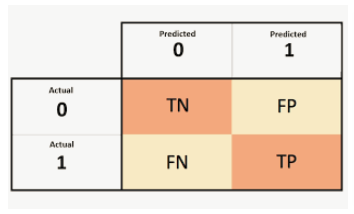
<font color="blue"> Pour le never five, on trouve bien uniquement des true negative et des falses négatives (les cinq classés en False)
pour le SGD on peut voir les quelques faux négatifs et faux positifs.</font>




### 2.2.3 Précision et rappel:
1. Calculez la précision, le rappel et le score F1 du modèle d’apprentissage

In [20]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#print(precision_recall_fscore_support(y_five_train, y_five_predict))

print("precision", precision_score(y_five_train, y_five_predict))
print("recall", recall_score(y_five_train, y_five_predict))
print("f1", f1_score(y_five_train, y_five_predict))


precision 0.5864278087554871
recall 0.9194568452380952
f1 0.7161173487866715


#### 2. Pour classifier les instances, le classifieur SGD calcule un score en se basant sur sa fonction de décision. Si le score est supérieur à un seuil, il affecte la classe positive à l’instance sinon il affecte la classe négative. Affichez les scores des différentes instances de la base d’apprentissage via la fonction "cross_val_predict". Optez pour une valeur de "decision_function" pour l’argument "method" et une validation croisée de type 3-fold cross-validation.

In [21]:
y_five_pred_df = cross_val_predict(clf, X_train, y_five_train, cv=3, method = "decision_function")

In [22]:
print(y_five_pred_df)

[-14313.84852931 -10553.18294833  -8728.6472111  ... -17416.45457216
 -23954.5919636  -31823.43598983]


#### 3. Calculez les précisions et les rappels de chaque instance en utilisant la fonction "precision_recall_curve"

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_five_train, y_five_pred_df)
print("precision : ", precision)
print("recall :", recall)
print("thresholds :", thresholds)

precision :  [0.08990568 0.08989046 0.08989196 ... 1.         1.         1.        ]
recall : [1.00000000e+00 9.99813988e-01 9.99813988e-01 ... 3.72023810e-04
 1.86011905e-04 0.00000000e+00]
thresholds : [-85907.77061427 -85895.29870887 -85769.29444275 ...  35816.3024108
  43561.10161608  46785.32787362]


#### 4. Tracez la courbe des précisions/rappels. L’axe des abscisses doit contenir les rappels et l’axe des ordonnées doit contenir les précisions. Interprétez les résultats.

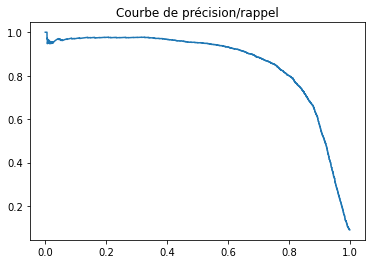

In [24]:
plt.plot(recall, precision)
plt.title("Courbe de précision/rappel")
plt.show()

<font color='blue'> _Avec le modèle d'apprentissage choisi, on avait obtenu une précision de 0.8829 pour un rappel de 0.7078 seulement. On pourrait être tenté de modifier les paramètres pour obtenir un meilleur rappel ; cependant, on constate en observant la courbe ci-dessus qu'une augmentation, même légère, du rappel causerait un effondrement de la précision. Il est donc nécessaire de trouver un compromis entre précision et rappel._ </font>

![prec_reca](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/320px-Precisionrecall.svg.png)

### 2.2.4 Courbe ROC:
#### 1. Calculez le taux de faux positifs (tfp), le taux de vrais positifs (tvp) et les seuils utilisés pour

classifier les données d’apprentissage. Pour ce faire, utilisez la fonction "roc_curve" du sous-
module "metrics" du module "sklearn"

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_five_train, y_five_pred_df, pos_label=1) 
#False Positive Rate #True Positive Rate
print(round(fpr,2))

<font color='blue'> _Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils (thresholds) de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :_

_Le taux de vrais positifs (TVP ou TPR) est l'équivalent du rappel (sensibilité)\* . Il est donc défini ainsi :_
    $ TPR = \frac{TP}{TP+FN}$

_Le taux de faux positifs (TFP ou FPR) équivaut à [1-spécificité]\** et est donc défini ainsi :_    $ FPR = \frac{FP}{FP+TN}$

_Une courbe ROC trace les valeurs TVP et TFP pour différents seuils de classification. Diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux positifs et de vrais positifs._ </font> 

<font color='blue' size=0.18>
* la sensibilité (le rappel) est la capacité du test à indentifier les positifs (par rapport au total des positifs réels)
** la spécificité est la capacité du test à identifier les négatifs (par rapport au total des négatifs réels)</font> 

#### 2. Tracez la courbe des ROC. L’axe des abscisses doit contenir les taux de faux positifs et l’axe
des ordonnées doit contenir les taux de vrais positifs. Ajoutez des titres à ces deux axes et
activer le mode "grid" avec la fonction grid de matplotlib

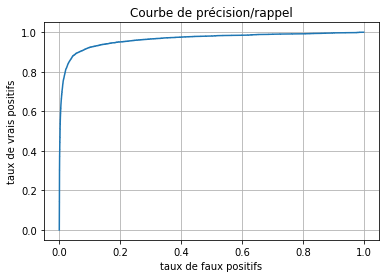

In [26]:
plt.plot(fpr, tpr)
plt.title("Courbe de précision/rappel")
plt.xlabel("taux de faux positifs")
plt.ylabel("taux de vrais positifs")
plt.grid(True)
plt.show()

#### 3. Calculez l’AUC (Area Under the Curve) du modèle d’apprentissage. Pour ce faire, utilisez
la fonction "roc_auc_score" du sous-module "metrics" du module "sklearn".

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_five_train, y_five_pred_df)

0.9644456176434307

## 3 Apprentissage d’un classifieur multi-classes
Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à 9) de la base de données MNIST.
### 3.1 Apprentissage des données
#### 1. En se basant sur le classifieur SGD, faites l’apprentissage du modèle en se basant sur toutes
les instances (images) d’apprentissage. Ainsi le modèle va apprendre à partir de toutes les
classes de la BD et non pas juste à partir de deux classes comme c’était le cas dans la partie
II de TP.

In [28]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = clf.predict(X_train)
print(clf.score(X_test, y_test))
print(y_pred[20:40])
print(y_train[20:40])

0.8773
[7 7 5 2 5 8 4 1 4 5 4 7 6 2 5 2 9 3 2 2]
[7 7 9 2 6 6 4 1 4 5 4 7 6 4 2 2 9 7 2 2]


#### 2. Via le modèle d’apprentissage bâti, prédisez la classe de la première instance de la base de
données (celle de la question 3). La prédiction va être, cette fois-ci, un chiffre de 0 à 9.

In [29]:
example = X[0].reshape(1,784)
clf.predict(example)

array([5])

#### 3. En utilisant l’objet qui instancie la classe SGDClassifier :
• Affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la
méthode SGD pour classifier la première instance de la base de données.

In [30]:
clf.decision_function(example)

array([[-13561.9262399 , -28335.05371805,  -7098.98195896,
          -326.96634579, -22108.67502243,   3969.84266957,
        -25131.92735972, -22459.14830055, -10509.60954319,
        -12342.65026812]])

• Affichez, via l’attribut "classes_", les différentes classes utilisées par le classifieur. Qu’est
ce que vous remarquez ?

In [31]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<font color='blue'> _Les scores ci-dessus correspondent chacun à une de ces dix classes (chiffres de 0 à 9). Le score le plus haut (3969) correspond au chiffre 5, c'est celui qui sera sélectionné pour formuler la prédiction._

### 3.2 Évaluation du modèle d’apprentissage sur les données d’apprentissage
#### 3.2.1 Taux de classification
###### 1. Écrivez un code qui répartit la base d’apprentissage en base d’apprentissage et en base de
validation en utilisant la méthode 3-fold cross-validation. Optez pour la valeur "accuracy"
pour l’argument "scoring" pour afficher : le taux de classification (accuracy) de chaque fold;
la moyenne des taux de classification

In [32]:
from sklearn.model_selection import cross_val_score
accu_folds = cross_val_score (clf,  X_train,  y_train,  cv=3, scoring= "accuracy")
print(accu_folds)
print(np.mean(accu_folds))

[0.8714  0.87455 0.88395]
0.8766333333333334


##### 2. Une des techniques d’amélioration des taux de classification est le "Scaling". Vérifiez ceci

en appliquant une standardisation sur les données d’apprentissage avec la classe StandartScaler.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


##### 3. Évaluez le modèle sur les nouvelles données d’apprentissage avec une validation croisée de type 3-fold cross-validation. 
Les résultats sont-ils meilleurs que ceux avant le Scaling?

In [34]:
accu_folds_scaled = cross_val_score (clf,  X_train_scaled,  y_train,  cv=3, scoring= "accuracy")
print(accu_folds_scaled)
print(np.mean(accu_folds_scaled))

C:\Users\utilisateur\anaconda3\envs\mypy36\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\utilisateur\anaconda3\envs\mypy36\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0.91005 0.91195 0.9044 ]
0.9087999999999999


C:\Users\utilisateur\anaconda3\envs\mypy36\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<font color='blue'> _Les résultats sonts meilleurs après standardisation_

#### 3.2.2 Matrice de Confusion
##### 1. En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d’apprentissage.

In [35]:
clf_scaled = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
clf_scaled.fit(X_train_scaled, y_train)
SGDClassifier(max_iter=5)
y_pred_scaled = clf_scaled.predict(X_train_scaled)
print(clf_scaled.score(X_test, y_test))
print(y_pred_scaled[20:40])
print(y_train[20:40])

C:\Users\utilisateur\anaconda3\envs\mypy36\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8163
[7 7 9 2 5 6 4 1 4 5 4 7 6 8 8 2 9 7 2 2]
[7 7 9 2 6 6 4 1 4 5 4 7 6 4 2 2 9 7 2 2]


##### 2. Affichez la matrice de confusion du modèle d’apprentissage. 
Pour ce faire, utilisez la fonction "confusion_matrix" du sous-module "metrics" du module "sklearn". La taille de la matrice de confusion, cette fois-ci, est 10x10 car on traite un problème de classification de 10

classes. Interprétez les résultats.

In [36]:
from sklearn.metrics import confusion_matrix
matrx = confusion_matrix(y_train, y_pred_scaled)
print(matrx)

[[5649    0    7    9    8   36   34    3  174    0]
 [   1 6448   41   16    5   36    7    6  153   12]
 [  22   22 5429   73   65   20   47   41  289   15]
 [  26   17  112 5334    1  185   23   39  311   59]
 [   9   16   46    6 5382    7   33   21  238  160]
 [  29   17   24  143   50 4572   84   18  375   64]
 [  26   14   49    1   33   79 5593    6  114    0]
 [  20   15   64   20   33    9    5 5763  118  191]
 [  16   62   45   83    3  107   26    8 5463   43]
 [  24   21   27   60  114   36    1  166  265 5208]]


Text(0, 0.5, 'valeurs calculées')

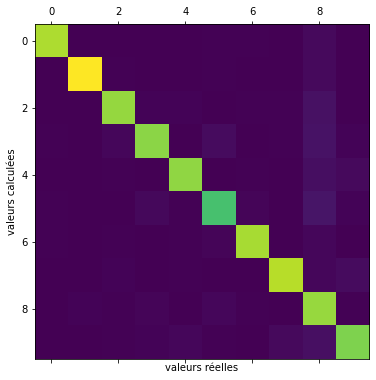

In [42]:
plt.figure(figsize=(6,6))
plt.matshow(matrx,cmap=plt.cm.viridis, fignum=1)
plt.xlabel("valeurs réelles")
plt.ylabel("valeurs calculées")

<font color = 'blue'> _Cette matrice de confusion (et sa visalisation) montrent que les valeurs sont globalemnt bien reconnues.Le 1 est particulièrement bien reconnu, tandis que le 5 et le 9 le sont un peu moins bien. Beaucoup de chiffres sont pris pour des 8._